##Código para regresión logística

In [ ]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin_bfgs

In [ ]:
# Define sigmoide, funcion de costo y gradientes
def sigmoid(z):
  return 1 / (1 +np.exp(-z))

def cost_function(theta, X, Y):
  theta =np.matrix(theta).T
  #hack!
  J = (1 / m) * (-Y.T * np.log(sigmoid(X * theta)+1e-7) - ((1 - Y).T * np.log(1 - sigmoid(X * theta)+1e-7)))
  print(J)
  return J[0, 0]

def gradients(theta, X, Y):
  theta = np.matrix(theta).T
  grad = ((1 / m) * X.T * (sigmoid(X * theta) - Y)).T
  grad = np.squeeze(np.asarray(grad))
  return grad

def predict(theta, X):
  return np.around(sigmoid(X * theta))

In [ ]:
# Carga data de data source 1
data = sp.matrix(sp.loadtxt("ex2data2.txt", delimiter=' '))
print("data original")
print(data)
X = data[:, 0:2]
#los datos normalizados tienen media 0 y desviacion estandar 1.
X = (X - np.mean(X))/np.std(X)
Y = data[:, 2]
m, n = X.shape
X_orig=X
# Imprimir datos normalizados
print(X)
# print(m,n)
# print(X.shape)
# print(Y.shape)

data original
[[ 0.051267   0.69956    1.       ]
 [-0.092742   0.68494    1.       ]
 [-0.21371    0.69225    1.       ]
 [-0.375      0.50219    1.       ]
 [-0.51325    0.46564    1.       ]
 [-0.52477    0.2098     1.       ]
 [-0.39804    0.034357   1.       ]
 [-0.30588   -0.19225    1.       ]
 [ 0.016705  -0.40424    1.       ]
 [ 0.13191   -0.51389    1.       ]
 [ 0.38537   -0.56506    1.       ]
 [ 0.52938   -0.5212     1.       ]
 [ 0.63882   -0.24342    1.       ]
 [ 0.73675   -0.18494    1.       ]
 [ 0.54666    0.48757    1.       ]
 [ 0.322      0.5826     1.       ]
 [ 0.16647    0.53874    1.       ]
 [-0.046659   0.81652    1.       ]
 [-0.17339    0.69956    1.       ]
 [-0.47869    0.63377    1.       ]
 [-0.60541    0.59722    1.       ]
 [-0.62846    0.33406    1.       ]
 [-0.59389    0.005117   1.       ]
 [-0.42108   -0.27266    1.       ]
 [-0.11578   -0.39693    1.       ]
 [ 0.20104   -0.60161    1.       ]
 [ 0.46601   -0.53582    1.       ]
 [ 0.67339   -

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.loadtxt is deprecated and will be removed in SciPy 2.0.0, use numpy.loadtxt instead
  


In [ ]:
# Computa cost and gradientes
# Inicializar
import numpy as np
X = np.hstack((np.ones((m, 1)), X_orig))
print(X.shape)
#X=sp.ones((m, 4))
# theta = sp.zeros(n+1) # Usa vector fila por optimizacion
theta=np.zeros(3)
print(theta.shape)
# Optimiza usando fmin_bfgs
print('Inicio de optimización')
res = fmin_bfgs(cost_function, theta, fprime=gradients,disp=True, maxiter=200, args=(X, Y))
theta = np.matrix(res).T
print(theta)

(118, 3)
(3,)
Inicio de optimización
[[0.69314698]]
[[0.69200452]]
[[0.69046884]]
[[0.69025962]]
[[0.6902498]]
[[0.69024097]]
[[0.69024093]]
[[0.69024093]]
[[0.69024092]]
[[0.69024092]]
Optimization terminated successfully.
         Current function value: 0.690241
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
[[-0.05244018]
 [-0.15483623]
 [-0.00924966]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.where is deprecated and will be removed in SciPy 2.0.0, use numpy.where instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.where is deprecated and will be removed in SciPy 2.0.0, use numpy.where instead
  import sys


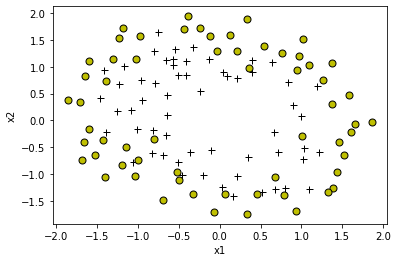

In [ ]:
# Plot fiqure 1 (data)                 
plt.figure(1)
plt.xlabel('x1')
plt.ylabel('x2')

pos = sp.where(Y == 1)[0]
neg = sp.where(Y == 0)[0]

plt.plot(X[pos, 1], X[pos, 2], 'k+', linewidth=2, markersize=7)
plt.plot(X[neg, 1], X[neg, 2], 'ko', markerfacecolor='y', markersize=7)


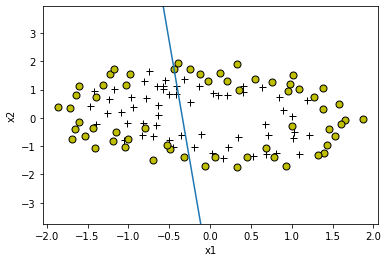

In [ ]:
# Plot fiqure 2 (linea de decision)
plt.figure(2)
plt.xlabel('x1')
plt.ylabel('x2')
# plt.ylim(-5,5)
       
plt.ylim(np.min(X[:, 2])-2, np.max(X[:, 2])+2)

pos = np.where(Y == 1)[0]
neg = np.where(Y == 0)[0]

plt.plot(X[pos, 1], X[pos, 2], 'k+', linewidth=2, markersize=7)
plt.plot(X[neg, 1], X[neg, 2], 'ko', markerfacecolor='y', markersize=7)

if X.shape[0] >= 3:
  plot_x = np.array([np.amin(X[:, 1]) -0 , np.amax(X[:, 1]) + 0])

  # viene de /theta_0+theta_1*x(1)+theta_2*x(2)=0 -> theta_2=(/theta_0+theta_1*x(1))/(-theta_2) ;)
  plot_y = (-1 / theta[2, 0]) * (theta[0, 0] + theta[1, 0] * plot_x)
  plt.plot(plot_x, plot_y)
  plt.savefig('1.png')

In [ ]:
p = predict(theta, X)
r = sp.mean(sp.double(p == Y)) * 100

print("Train Accuracy: {r}%".format(**locals()))


Train Accuracy: 55.08474576271186%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  


In [ ]:
theta

matrix([[1.71950757],
        [3.90308725],
        [3.81401615]])